# Clustering comparisons between UNCURL and paper

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.metrics.cluster import adjusted_rand_score as ari

In [3]:
spinal_labels = pd.read_table('spinal_cluster_assignment.txt', header=None)

In [4]:
cells_subset = np.loadtxt('uncurl_cells_subset.txt', dtype=bool)

In [5]:
w = np.loadtxt('w.txt')

In [6]:
uncurl_labels = w.argmax(0)

In [8]:
spinal_labels = spinal_labels.as_matrix().astype(str)

In [10]:
spinal_labels = spinal_labels.flatten()

In [11]:
nmi(spinal_labels[cells_subset], uncurl_labels)

0.6795663952329298

In [12]:
ari(spinal_labels[cells_subset], uncurl_labels)

0.6365951658895126

The NMI and ARI are both pretty high. Now we want to compare the actual learned clusters, to see which labels match with what.

In [21]:
spinal_label_ids = np.array([x.split()[0] for x in spinal_labels])

In [22]:
def int_or_nan(x):
    if x=='nan':
        return 0
    else:
        return int(x)
    
spinal_label_ids = np.array(list(map(int_or_nan, spinal_label_ids)))

In [26]:
nmi(spinal_label_ids[cells_subset], uncurl_labels)

0.6795663952329296

In [27]:
cluster_counts = np.zeros((len(set(spinal_label_ids)), len(set(uncurl_labels))))

In [28]:
for i, j in zip(spinal_label_ids[cells_subset], uncurl_labels):
    cluster_counts[i, j] += 1

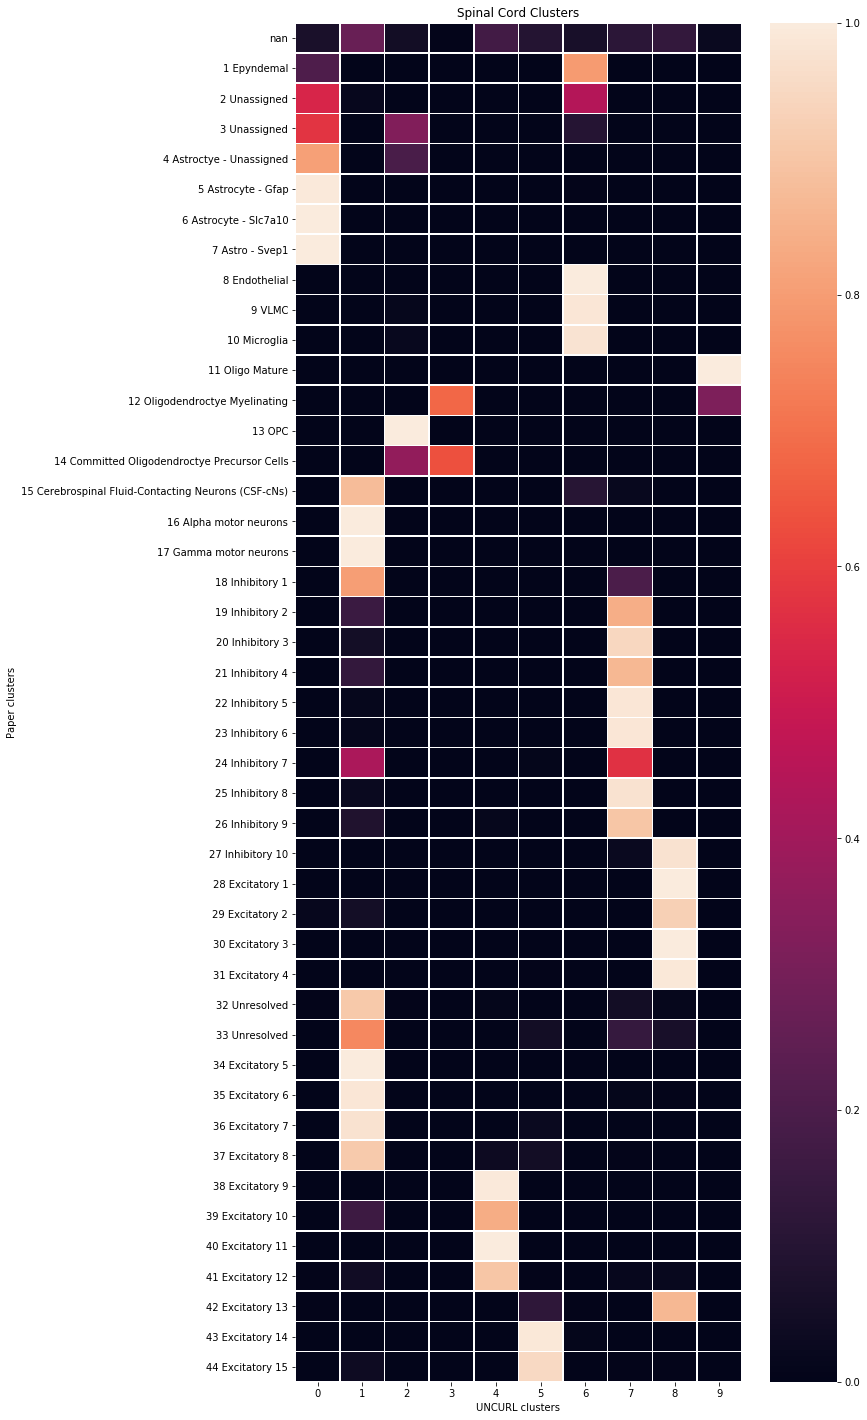

In [55]:
plt.figure(figsize=(10, 25))
sns.heatmap(cluster_counts/cluster_counts.sum(1)[:,np.newaxis],
            yticklabels=sorted(list(set(spinal_labels)), key=lambda x: int_or_nan(x.split()[0])),
            vmin=0, vmax=1, linewidths=0.5)
plt.xlabel('UNCURL clusters')
plt.ylabel('Paper clusters')
plt.title('Spinal Cord Clusters')
plt.savefig('uncurl_k10_clusters.png', dpi=200)

# Re-do with k=20 for uncurl

In [56]:
w2 = np.loadtxt('w_k20.txt')

In [65]:
uncurl_labels_2 = w2.argmax(0)

In [70]:
nmi(spinal_labels[cells_subset], uncurl_labels_2)

0.6866968482950455

In [71]:
ari(spinal_labels[cells_subset], uncurl_labels_2)

0.4188386504881944

In [66]:
cluster_counts = np.zeros((len(set(spinal_label_ids)), len(set(uncurl_labels_2))))

In [67]:
for i, j in zip(spinal_label_ids[cells_subset], uncurl_labels_2):
    cluster_counts[i, j] += 1

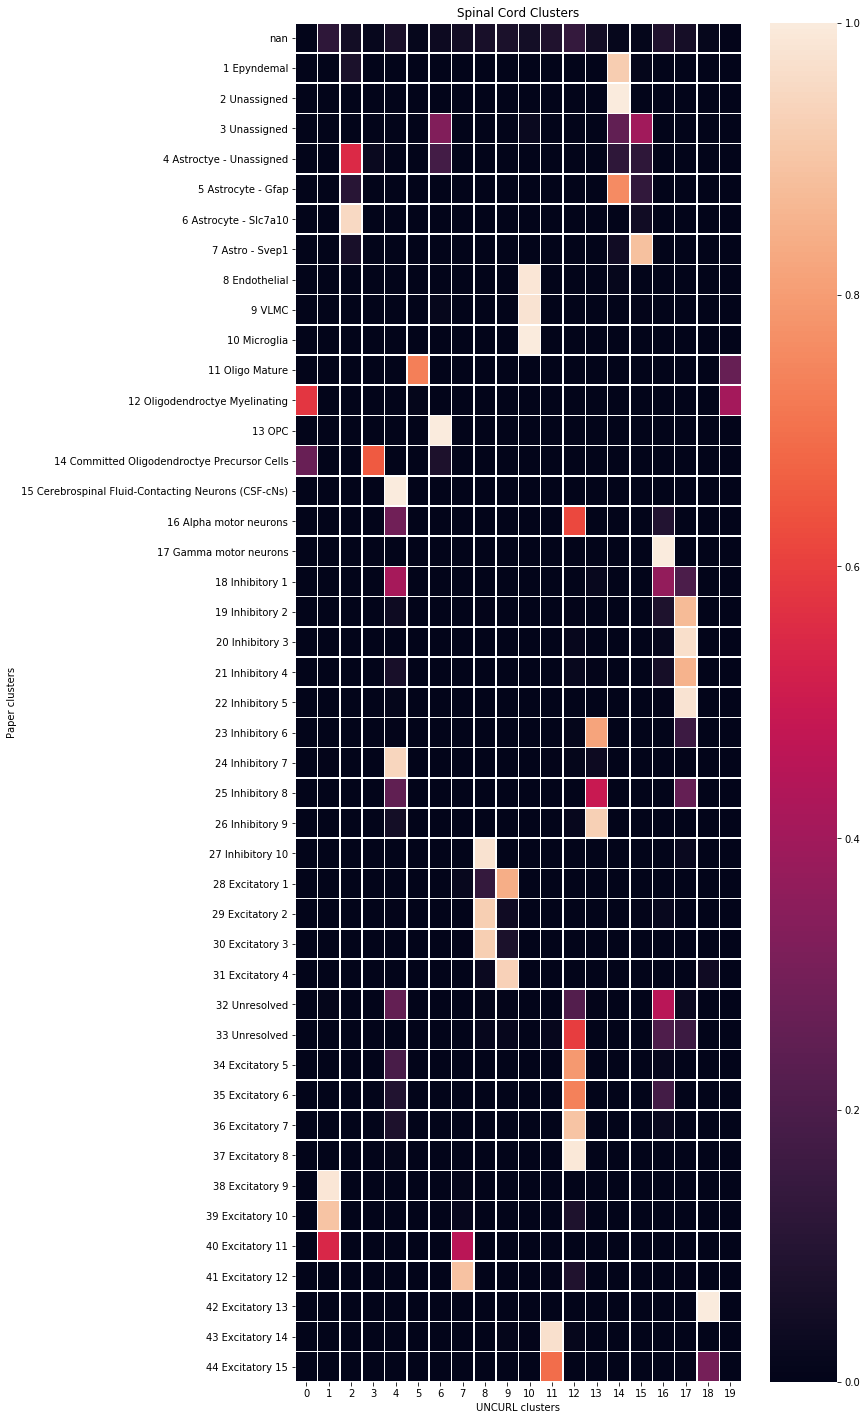

In [68]:
plt.figure(figsize=(10, 25))
sns.heatmap(cluster_counts/cluster_counts.sum(1)[:,np.newaxis],
            yticklabels=sorted(list(set(spinal_labels)), key=lambda x: int_or_nan(x.split()[0])),
            vmin=0, vmax=1, linewidths=0.5)
plt.xlabel('UNCURL clusters')
plt.ylabel('Paper clusters')
plt.title('Spinal Cord Clusters')
plt.savefig('uncurl_k20_clusters.png', dpi=200)